In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd

all_data={}
stds={}
for j in [150,250]:
    my_array=np.zeros((200,200,100))
    my_array2=np.zeros((200,200,100))
    data03=pd.read_csv("D:Desktop/std_sims/results/std_water_depthtest_"+str(j)+"MV.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stds'])
    data03.dose=(data03.dose)/(1.60218e-19)*0.75e-6;
    data03.stds=(data03.stds)/(1.60218e-19)*0.75e-6/np.sqrt(5e6);
    for i in np.arange(0,len(data03.x)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
        my_array2[data03.x[i]][data03.y[i]][data03.z[i]]=data03.stds[i]
    stds[j]=np.array(my_array2)
    all_data[j]=np.array(my_array)



In [8]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 22}


matplotlib.rc('font', **font)


In [28]:
%matplotlib qt
figure(1,figsize=(8,8))
plt.imshow(stds[150][100]/all_data[150][100]*100,vmax=20)
plt.colorbar()

figure(2,figsize=(8,8))
plt.imshow(stds[150][:,100]/all_data[150][100]*100,vmax=20)
plt.colorbar()

a=stds[150]/all_data[150]
print(np.max(a[100:150,100,0]))


C:\Users\User\AppData\Local\Temp/ipykernel_14856/3027233591.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(stds[150][100]/all_data[150][100]*100,vmax=20)
C:\Users\User\AppData\Local\Temp/ipykernel_14856/3027233591.py:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.imshow(stds[150][:,100]/all_data[150][100]*100,vmax=20)


0.46620066463623816


C:\Users\User\AppData\Local\Temp/ipykernel_14856/3027233591.py:10: RuntimeWarning: invalid value encountered in true_divide
  a=stds[150]/all_data[150]


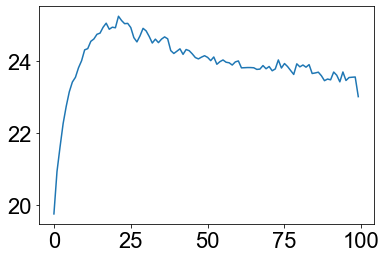

In [5]:
figure(1)
area=[]
for i in np.arange(0,100):
    area.append(np.mean(all_data[250][80:100,80:100,i]))
plt.plot(z,area)
np.save("d:Desktop/SFRT-Topas/vhee/vhee_patient/depth_test/area_250.npy",area)

26 41
131.02795083246673 108.76092144155167


Text(0.5, 1.0, 'Mini-GRID')

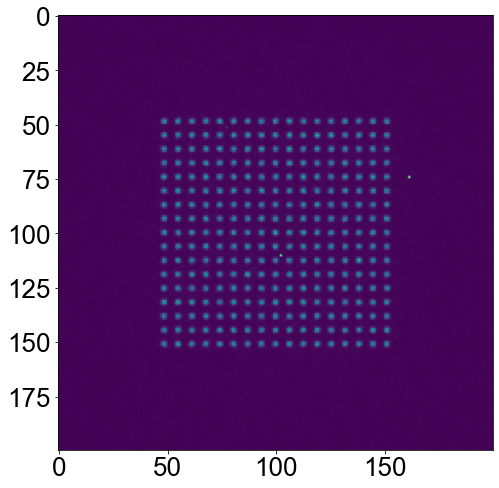

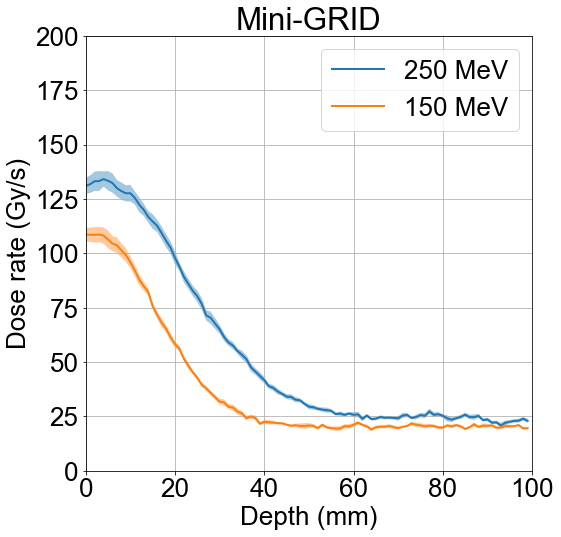

In [9]:

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 26}

matplotlib.rc('font', **font)
figure(1,figsize=(8,8))
plt.imshow(all_data[250][:,:,0])
# plt.imshow(all_data)
PDD250=np.zeros(100)
PDD150=np.zeros(100)
PDD250_err=np.zeros(100)
PDD150_err=np.zeros(100)
index=[93,99,106]
#combos=permutations(index,2)
for i in np.arange(0,100):
    PDD250[i]=np.mean([all_data[250][j,k,i] for j in index for k in index])
    PDD250_err[i]=np.std([all_data[250][j,k,i] for j in index for k in index])/np.sqrt(9)
    PDD150[i]=np.mean([all_data[150][j,k,i] for j in index for k in index])
    PDD150_err[i]=np.std([all_data[150][j,k,i] for j in index for k in index])/np.sqrt(9)
figure(3,figsize=(8,8))
plt.plot(z,PDD250,label='250 MeV',lw=2)
plt.plot(z,PDD150,label='150 MeV',lw=2)
plt.fill_between(z, PDD250-PDD250_err, PDD250+PDD250_err,alpha=0.4)
plt.fill_between(z, PDD150-PDD150_err, PDD150+PDD150_err,alpha=0.4)
plt.grid()
plt.xlim(0,100)
plt.ylim(0,200)
plt.xlabel('Depth (mm)')
plt.ylabel('Dose rate (Gy/s)')
plt.legend()
#plt.vlines(z[41],0,500,colors='red',lw=1)
#plt.vlines(z[26],0,500,colors='red',lw=1)
print(z[26],z[41])
#plt.hlines(40,0,500,colors='red',lw=1)
print(PDD250[0],PDD150[0])
plt.title('Mini-GRID')